In [1]:
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.pipeline
import sklearn.datasets
import sklearn.metrics
import matplotlib.pyplot as plt
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

## 4.1 线性回归
在第一章，我们介绍了一个简单的生活满意度回归模型:
+ $life\_satisfaction = \theta_{0} + \theta_{1} * GDP\_per\_capita$

这个模型仅仅是输入量`GDP_per_capita`的线性函数，$\theta_0$和$\theta_1$是这个模型的参数，线性模型更一般化的描述指通过计算输入变量的加权和，并加上一个常数偏置项(截距项)来得到一个预测值，如`公式4-1`：
+ $\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 +\dots +\theta_nx_n$

其中，
+ $\hat{y}$表示预测结果
+ $n$表示特征的个数
+ $x_i$表示第$i$个特征的值
+ $\theta_j$表示第$j$个参数(包括偏置项$\theta_0$和特征权重值$\theta_1, \theta_2, \dots, \theta_n$

上述公式可以写成更为简洁的向量形式，如`公式4-2`：
+ $\hat{y} = h_{\theta} (\mathbf{x}) = \theta^T  \cdot \mathbf{x}$

其中，
+ $\theta$表示模型的参数向量，包括偏置项$\theta_0$和特征权重值$\theta_1$到$\theta_n$
+ $\theta^T$表示向量$\theta$的转置(行向量变为了列向量)
+ $\mathbf{x}$为每个样本中特征值的向量形式，包括$x_{1}$到$x_{n}$，而且$x_0$恒为1
+ $\theta^T  \cdot \mathbf{x}$表示$\theta^T$和$\mathbf{x}$的点积
+ $h_{\theta}$表示参数为$\theta$的假设函数

怎么样去训练一个线性回归模型呢？好吧，回想一下，训练一个模型指的是设置模型的参数使得这个模型在训练集的表现较好。为此，我们首先需要找到一个衡量模型好坏的评定方法。在第二章，我们介绍到在回归模型上，最常见的评定标准是均方根误差(RMSE，详见`公式2-1`)。因此，为了训练一个线性回归模型，你需要找到一个$\theta$值，它使得均方根误差(标准误差)达到最小值。实践过程中，最小化均方误差比最小化均方根误差更加的简单，这两个过程会得到相同的$\theta$，因为函数在最小值时候的自变量，同样能使函数的方根运算得到最小值。

在训练集$\mathbf{X}$上使用`公式4-3`来计算线性回归假设$h_{\theta}$的均方差(MSE)。
+ $MSE(\mathbf{X}, h_{\theta}) = \frac{1}{m} \sum\limits_{i=1}^m{\left(\theta^T \cdot \mathbf{x}^{(i)}-y^{(i)}\right)}^2$

公式中符号的含义大多数都在第二章(详见`符号`)进行了说明，不同的是：为了突出模型的参数向量$\theta$，使用$h_{\theta}$来代替$h$。以后的使用中为了公式的简洁，使用$MSE(\theta)$来代替$MSE(\mathbf{X}, h_{\theta})$。

### 4.1.1 正规方程(The Normal Equation)
为了找到最小化损失函数的$\theta$值，可以采用公式解，换句话说，就是可以通过解正规方程直接得到最后的结果。

**公式4-4：正规方程**
+ $\hat{\theta} = ({\mathbf{X}}^T\cdot\mathbf{X})^{-1}\cdot{\mathbf{X}}^T\cdot\mathbf{y}$

其中，
+ $\hat{\theta}$指最小化损失$\theta$的值
+ $\mathbf{y}$是一个向量，其包含了$y^{(1)}$到$y^{(m)}$的值

让我们生成一些近似线性的数据来测试一下这个方程。

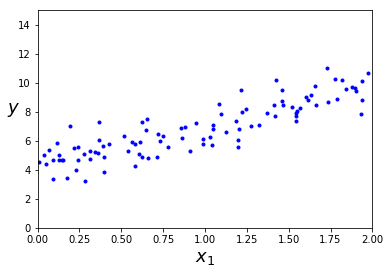

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

现在让我们使用正规方程来计算$\hat{\theta}$，我们将使用Numpy的线性代数模块(`np.linalg`)中的`inv()`函数来计算矩阵的逆，以及`dot()`方法来计算矩阵的乘法。

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

> `np.r_`是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等，类似于pandas中的concat()    
> `np.c_`是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等，类似于pandas中的merge()

我们生产数据的函数实际上是$y = 4 + 3x_0 + Gaussian\_noise$。让我们看一下最后的计算结果。

In [4]:
theta_best

array([[4.21509616],
       [2.77011339]])

我们希望最后得到的参数为$\theta_0 = 4, \theta_1 = 3$而不是$\theta_0 = 4.2150, \theta_1 = 2.7701$。这已经足够了，由于存在噪声，参数不可能达到到原始函数的值。

现在我们能够使用$\hat{\theta}$来进行预测：

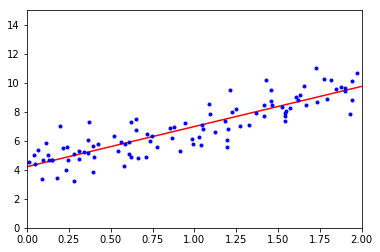

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

使用下面的`Scikit-Learn`代码可以达到相同的效果：

In [6]:
lin_reg = sklearn.linear_model.LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

### 4.1.2 计算复杂度
正规方程需要计算矩阵${\mathbf{X}}^T\cdot\mathbf{X}$的逆，它是一个$n*n$的矩阵($n$是特征的个数)。这样一个矩阵求逆的运算复杂度大约在$O(n^{2.4})$到$O(n^3)$之间，具体值取决于计算方式。换句话说，如果你将你的特征个数翻倍的话，其计算时间大概会变为原来的5.3($2^{2.4}$)到8$(2^3)$倍。

> 当特征的个数较大的时候(例如：特征数量为100000)，正规方程求解将会非常慢

有利的一面是，这个方程在训练集上对于每一个实例来说是线性的，其复杂度为$O(m)$，因此只要有能放得下它的内存空间，它就可以对大规模数据进行训练。同时，一旦你得到了线性回归模型(通过解正规方程或者其他的算法)，进行预测是非常快的。因为模型中计算复杂度对于要进行预测的实例数量和特征个数都是线性的。 换句话说，当实例个数变为原来的两倍多的时候(或特征个数变为原来的两倍多)，预测时间也仅仅是原来的两倍多。

接下来，我们将介绍另一种方法去训练模型。这种方法适合在特征个数非常多，训练实例非常多，内存无法满足要求的时候使用。